# Harry Potter Movie Review Analysis Weighted Title
## By Ali Ho 

In [2]:
#Packages and functions to be used
import os 

#For regex 
import re

#importing pandas 
import pandas as pd 

#To create a wordcloud/graphs
import numpy as np 
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib import cm 
from colorspacious import cspace_converter
import seaborn as sns
#Allows for randomization, you can set a seed to have reproducable results
import random

#from PIL import Image
from PIL import ImageFilter
import numpy as np
#Allows for several values for the same dictionary key 
import multidict

#To get a count of words (used in the term_frequency)
from collections import Counter 

#NLTK Packages 
#To process text using nltk (remove stopwords, lemmatize, tokenize...)
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer 
#Porter stemmer 
from nltk.stem.porter import PorterStemmer 

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

#To perform machine learning in Naive Bayes I need to import the following packages 
from sklearn.model_selection import train_test_split 
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
#Multinomrial classifier for naive bayes
from sklearn.naive_bayes import MultinomialNB
#SVMs 
from sklearn.svm import SVC
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
#confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

### Functions I created that will be used in the document: 

In [3]:
#Function 1: Creating a function to read in my files. This function will read in all the files in a specific directory. 
    #inputs: list of all of the file names to read 
    #        the path where the files are located 
    #outputs: a list, each element in the list is the content for each file that was read in. 
def reading_in_files(list_of_file_names, path):
    empty_list = []
    for file in list_of_file_names: 
        file = open(path+ "\\" + file)
        data = file.read() 
        empty_list.append(data)
        file.close()
    return(empty_list)

#Function 2: Creating a function to split the output from the just_compound_and_doc function. 
    #inputs: the list that is to be split,
            #the item that we want to split on 
    #outputs: a list of split lists that when put into a df, will create columns based on where the list was split
def list_split(list_to_be_split, item_to_split_on):
    empty_list = []
    for element in list_to_be_split: 
        empty_list.append(element.split(item_to_split_on))
    return(empty_list)

#Function 2: Vader (from NLTK) sentiment intensity score calculator. This function will calculate the polarity score 
#for each file. It will return a list of dictionaries. Each dictionary will contain the following: a compound score, 
#positive score, negative score, neutral score, and the opinion. 
    #inputs: a list of the content to be analyzed (this is what is returned in the reading_in_files function)
    #Output: a list of dictionaries. Each dictionary will contain the following: a compound score, postive score, 
    #        negative score, neutral score, and the opinion 
def sentiment_intensity_score(sentiment_files): 
    sent_analyze = SIA()
    results = []
    for word in sentiment_files: 
        score = sent_analyze.polarity_scores(word)
        score["sentiment_file"] = word 
        results.append(score)
    return(results)


#Function 3: 
    #What the function does: to be creating a list of reviews, then joining the reviews together to a string and 
                             #getting a count for each word in the string
    #Input: df and column 
    #Output: a dictionary with each word and the count of the word
def creating_freq_list_from_df_to_dict(df, column):
    reviews = df[column].tolist() 
    review_string = " ".join(reviews)
    review_string = review_string.split()
    review_dict = Counter(review_string)
    return review_dict

#Function 3: 
    #What the function does: creates a word cloud that is in the shape of the mask passed in
    #Input: the location where the mask image is saved, the frequency word dictionary, and the max # of words to include
            #and the title of the plot 
def create_word_cloud_with_mask(path_of_mask_image, dictionary, 
                                max_num_words, title):
        mask = np.array(Image.open(path_of_mask_image))
        #creating the word cloud 
        word_cloud = WordCloud(background_color = "white", 
                               max_words = max_num_words, 
                              mask = mask, max_font_size = 125, 
                              random_state = 1006)
        word_cloud.generate_from_frequencies(dictionary)
        #creating the coloring for the word cloud 
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize = [8,8])
        plt.imshow(word_cloud.recolor(color_func = image_colors), 
                  interpolation = "bilinear")
        plt.title(title)
        sns.set_context("poster")
        plt.axis("off")
        return plt

#Function 4: 
    #What the function does: creates a df with two columns: word and count of the top 12 words
    #Input: the word frequency dictionary 
    #Output: a df with the top 12 words 
def word_freq_dict_to_df_top_words(dictionary, number_of_words_wanted): 
    df = pd.DataFrame.from_dict(dictionary,orient='index')
    df.columns = ["count"]
    df["word"] = df.index
    df.reset_index(drop = True, inplace = True)
    df.sort_values(by=["count"], ascending = False, inplace = True)
    df = df[:number_of_words_wanted]
    return(df)

#Function 5: 
    #What the function does: creates a bar graph
    #Input: the df and title of the graph 
    #Output: the bar graph
def top_words_bar_plot(df, title): 
    with sns.plotting_context("talk"):
        graph = sns.barplot(y = "count", x = "word", data = df, 
                           palette = "GnBu_d")
        plt.title(title)
        plt.xlabel("Word")
        plt.ylabel("Count")
        plt.xticks(rotation = 90)
        return plt

#Function 6: 
    #What the function does: creates a df with two columns: word and count 
    #Input: the word frequency dictionary 
    #Output: a df
def word_freq_dict_to_df_all_words(dictionary): 
    df = pd.DataFrame.from_dict(dictionary,orient='index')
    df.columns = ["count"]
    df["word"] = df.index
    df.reset_index(drop = True, inplace = True)
    df.sort_values(by=["count"], ascending = False, inplace = True)
    return(df)
    
#Function 7: 
    #What the function does: Returns 2 statements: One with the total number of words and the other with the number 
                            #of unique words 
        #Input: the frequency count dictionary 
        #output: 2 statements 
def total_words_unique_words(dictionary): 
    eda_reviews_all_words = word_freq_dict_to_df_all_words(dictionary)
    print("The total number of words is", sum(eda_reviews_all_words["count"]))
    print("The total number of unique words is", len(dictionary)) 
    
#Function 8: 
    #What the function does: It duplicates the words in each review that are in all caps. 
    #Input: the review to be analyzed
    #Output: a new review where the first words of the review are the duplicated words from all caps and 
            #then the original review follows
def duplicate_all_cap_words(review): 
    capitalized_word = ""
    for word in re.findall('([A-Z][A-Z]+\w)', review):
        if word in review: 
            capitalized_word = capitalized_word + " " + word
    new_review = capitalized_word +" " + review
    return new_review
#Function 9: Weighted Title 
def duplicate_title(review): 
    new_review = review + " " + review +" " + review + " " + review
    return(new_review)

#Function 8: 
def get_count_of_all_cap_words(review): 
    count = 0 
    for word in re.findall('([A-Z][A-Z]+\w)', review):
        if word in review: 
            count += 1
    return count

#Function 8: 
def get_count_of_all_words(review): 
    count = 0 
    for word in re.findall('([A-z]+\w)', review):
        if word in review: 
            count += 1
    return count

#Function 9: 
    #What the function does: It removes all words that have less than 3 characters in it. 
    #Input: The string to have stopwords removed 
    #Ouptut: The string with the words with 2 or less characters removed 
def remove_words_less_than_3_characters(string):
    new_string = ""
    for word in re.findall('[A-z][A-z]+\w', string): 
        new_string = new_string + " " + word
    return new_string

#Function 10: 
    #What the function does: Removes stopwords 
    #Input: a list of stopwords to be removed, the tokenized item that you want to remove stopwords in 
    #Output: the same item type back with the stopwords removed. 
def stop_word_removal(stopwords, item_that_you_want_to_remove_stopwords_in): 
    removed_stopwords = [] 
    for word in item_that_you_want_to_remove_stopwords_in: 
        if word in stopwords: 
            continue
        if word not in stopwords: 
            removed_stopwords.append(word)
    return(removed_stopwords)

#Function11: 
    #What the function does: It takes the tokens from the df and joins it into a string, then replaces the "," with a space
    #Input: the df and column to be changed 
    #Output: the data untokenized 
def getting_data_ready_for_freq(df, column): 
    df[column] = df[column].apply(",".join)
    df[column] = df[column].str.replace(",", " ")
    return(df[column])

#Function 12: 
    #What the function does: Takes the words in a column and uses the SentimentInstensityAnalyzer from nltk and 
                             #gets the sentiment score for every word in the column. If the word has a sentiment 
                             #score greater than or equal to .3 (max is 1) or less than or equal to -.3 (-1 is min)
                             #the word is added to the keep_words list if not the word will be removed. 
def pos_neg_words(column):
    sia = SIA()
    keep_words = []

    for word in column:
        if (sia.polarity_scores(word)['compound']) >= 0.005:
            keep_words.append(word)
        elif (sia.polarity_scores(word)['compound']) <= -0.005:
            keep_words.append(word)
        elif word == "not": 
            keep_words.append(word)
        else:
            continue               
    return keep_words

#Function 13: 
    #What the function does: It uses the Porter stemmer to stem each word in the column 
    #Input: the item that you want to be stemmed 
    #Output: the same item type back with the words stemmed 
def stem_fun(item_that_you_want_to_be_stemmed):     
    stemmer = PorterStemmer() 
    stemmed = [stemmer.stem(token) for token in item_that_you_want_to_be_stemmed]
    return(stemmed)

#Function 14: 
    #What the function does: It lemmatizes the data without using pos, meaning that it will not be as efficient
    #Input: item to be lemmatized (the column)
    #Output: the column lemmatized 
def lemma_func(item_to_lemmatize):
    lemmatizer = WordNetLemmatizer()
    lemmatized_review = []
    for token in item_to_lemmatize: 
        word = lemmatizer.lemmatize(token)
        lemmatized_review.append(word)
    return lemmatized_review

#Function 15: 
    #What the function does: Creates bigrams from a tokenized column in a dataframe
    #Input: the column that you want to create a ngram with 
    #Output: a list of ngrams
def creating_ngrams(item_to_be_ngrammed, number_of_ngram):
    # zip function helps generate ngrams
    ngrams = zip(*[item_to_be_ngrammed[i:] for i in range(number_of_ngram)])
    # Concatentate the tokens into ngrams and return
    return ["_".join(ngram) for ngram in ngrams]

#Function 16: 
    #What the function does: Create a bag of words from a column in a df... 
    #Input: df and column to be transformed 
    #Output: A list of dictionaries for each row in the df that contains the word as a key and the count as the value 
def bag_of_words(df, column_to_be_bagged):
    bag_of_words = [] 
    from collections import Counter 
    for word in df[column_to_be_bagged]: 
        bag_of_words.append(Counter(word))
    return bag_of_words

#Function 17: 
    #What the function does: Takes the bag of words and makes it into a giant sparse matrix df, with 0s where nas are
    #Input: bag of words 
    #Output: Giant df with the words as column names and counts as row entries 
def bow_to_df(bag_of_words): 
    df = pd.DataFrame.from_records(bag_of_words)
    df = df.fillna(0).astype(int)
    return(df)

#Function 18: 
    #What the function does: It normalizing the df by getting the sum of each row and then dividing every entry by 
                             #the sum, resulting in the percentage make-up of each word
    #Input: dataframe to be normalized 
    #Output: normalized dataframe 
def normalize_df(df):
    names = df.columns 
    df["total"] = df.sum(axis = 1)
    for name in names: 
        df[name] = df[name]/df["total"]
    return(df)

#Function 19: 
    #What the function does: Creates a confusion matrix graph 
    #Input: the confusion matrix, accuracy_label, and type of df 
    #Output: Confusion matrix graph
def confusion_matrix_graph (cm, accuracy_label, type_of_df): 
    g = plt.figure(figsize=(8, 8))
    g = sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', cbar = False);
    g = plt.ylabel('Actual');
    g = plt.xlabel('Predicted');
    g = all_sample_title = type_of_df +' Accuracy Score: {0}'.format(round(accuracy_label, 4))
    g = plt.title(all_sample_title, size = 12);
    return(g)


In [162]:
#First step is importing the documents
#Getting a list of all the file names in my pos file 
positive = os.listdir("C:\\Users\\ho511\\Desktop\\IST_736\\homeworks\\week_3\\harry_potter_corpus\\pos")
positive_path = "C:\\Users\\ho511\\Desktop\\IST_736\\homeworks\\week_3\\harry_potter_corpus\\pos"

#Getting a list of all the file names in my neg file 
negative = os.listdir("C:\\Users\\ho511\\Desktop\\IST_736\\homeworks\\week_3\\harry_potter_corpus\\neg")
negative_path = "C:\\Users\\ho511\\Desktop\\IST_736\\homeworks\\week_3\\harry_potter_corpus\\neg"

#### looking to see if I successfully got the file names 

In [163]:
print(positive[:10])

['10_hp1_0.txt', '10_hp1_1.txt', '10_hp1_10.txt', '10_hp1_11.txt', '10_hp1_12.txt', '10_hp1_13.txt', '10_hp1_14.txt', '10_hp1_15.txt', '10_hp1_16.txt', '10_hp1_18.txt']


#### looking at the first 10 items in the negative list to ensure I successfully extracted the file names 

In [164]:
print(negative[:10])

['1_hp1_1.txt', '1_hp1_10.txt', '1_hp1_11.txt', '1_hp1_12.txt', '1_hp1_13.txt', '1_hp1_14.txt', '1_hp1_15.txt', '1_hp1_16.txt', '1_hp1_17.txt', '1_hp1_18.txt']


#### Using my reading_in_file function to read in all of the positive files 

In [165]:
positive_reviews = reading_in_files(positive, positive_path)

#### Confirming that the function worked by looking at the first review

In [166]:
positive_reviews[3]

"10** Harry Potter and the Sorcerer's Stone\n== 10/10 - an unforgettable start to a fantastic film series and the career of the impeccable Emma Watson (and the other kids)"

#### The score is separated from the review by **, the title is separated from the review on ==. It is important to note, that if I split on the **, it is possible that the review will also be split. There is a high likelihood that the "**" characters are included in some of the review text as well. This will have to be addressed. 

In [167]:
positive_reviews = list_split(positive_reviews, "**")

#### Checking to make sure that it worked.

In [168]:
positive_reviews[3]

['10',
 " Harry Potter and the Sorcerer's Stone\n== 10/10 - an unforgettable start to a fantastic film series and the career of the impeccable Emma Watson (and the other kids)"]

#### Changing the positive_review list to a data frame. 

In [169]:
positive_df = pd.DataFrame(positive_reviews)

#### Looking at the first 5 rows 

In [170]:
positive_df

0                                                  1     2     3     4   \
0    10   The Magic Comes To Life!\n== Once upon a time...  None  None  None   
1    10   Pure Magic\n== This movie is a delight for th...  None  None  None   
2    10   Enchantment, Trapdoor to Imaginary World.\n==...  None  None  None   
3    10   Harry Potter and the Sorcerer's Stone\n== 10/...  None  None  None   
4    10   Great Journey to the Magic World\n== I watch ...  None  None  None   
..   ..                                                ...   ...   ...   ...   
487   9   I'm Sorry, Hermoine and Ron Who?\n== The one ...  None  None  None   
488   9   A fantastic ending\n== This movie was the per...  None  None  None   
489   9   LEGENDARY!\n== Best cinematic universe out th...  None  None  None   
490   9   Good but ending changed for worse\n== I was r...  None  None  None   
491   9   Great conclusion, of fantastic story\n== i wa...  None  None  None   

       5     6     7     8     9   ...    18    19    20    21    22    23  \
0    None  None  None  None  None  ...  None  None  None  None  None  None   
1    None  None  None  None  None  ...  None  None  None  None  None  None   
2    None  None  None  None  None  ...  None  None  None  None  None  None   
3    None  None  None  None  None  ...  None  None  None  None  None  None   
4    None  None  None  None  None  ...  None  None  None  None  None  None   
..    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
487  None  None  None  None  None  ...  None  None  None  None  None  None   
488  None  None  None  None  None  ...  None  None  None  None  None  None   
489  None  None  None  None  None  ...  None  None  None  None  None  None   
490  None  None  None  None  None  ...  None  None  None  None  None  None   
491  None  None  None  None  None  ...  None  None  None  None  None  None   

       24    25    26    27  
0    None  None  None  None  
1    None  None  None  None  
2    None  None  None  None  
3    None  None  None  None  
4    None  None  None  None  
..    ...   ...   ...   ...  
487  None  None  None  None  
488  None  None  None  None  
489  None  None  None  None  
490  None  None  None  None  
491  None  None  None  None  

[492 rows x 28 columns]

In [171]:
positive_df["review"] = positive_df[positive_df.columns[1:]].apply(lambda row: " ".join(row.dropna().astype(str)), axis = 1)

In [172]:
positive_title = positive_df["review"].tolist()

In [173]:
positive_title[3]

" Harry Potter and the Sorcerer's Stone\n== 10/10 - an unforgettable start to a fantastic film series and the career of the impeccable Emma Watson (and the other kids)"

In [174]:
positive_title = list_split(positive_title, "==")

In [175]:
positive_df = pd.DataFrame(positive_title)

In [176]:
positive_df.head()

0  \
0                    The Magic Comes To Life!\n   
1                                  Pure Magic\n   
2   Enchantment, Trapdoor to Imaginary World.\n   
3       Harry Potter and the Sorcerer's Stone\n   
4            Great Journey to the Magic World\n   

                                                   1  
0   Once upon a time (and not that long ago), in ...  
1   This movie is a delight for those of all ages...  
2   This is not a film, it is a trap door to a li...  
3   10/10 - an unforgettable start to a fantastic...  
4   I watch this movie again in 2019, because i t...

In [177]:
positive_df.columns = ["title", "review"]

#### This shows that my worry about the reviews being split on ** was warranted. I need to joing the review text to one column.  Positive, is the the score was successfully extracted

In [178]:
positive_df["title"] = positive_df["title"].apply(lambda row: duplicate_title(row)) 

In [179]:
positive_df

title  \
0     The Magic Comes To Life!\n  The Magic Comes T...   
1     Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2     Enchantment, Trapdoor to Imaginary World.\n  ...   
3     Harry Potter and the Sorcerer's Stone\n  Harr...   
4     Great Journey to the Magic World\n  Great Jou...   
..                                                 ...   
487   I'm Sorry, Hermoine and Ron Who?\n  I'm Sorry...   
488   A fantastic ending\n  A fantastic ending\n  A...   
489   LEGENDARY!\n  LEGENDARY!\n  LEGENDARY!\n  LEG...   
490   Good but ending changed for worse\n  Good but...   
491   Great conclusion, of fantastic story\n  Great...   

                                                review  
0     Once upon a time (and not that long ago), in ...  
1     This movie is a delight for those of all ages...  
2     This is not a film, it is a trap door to a li...  
3     10/10 - an unforgettable start to a fantastic...  
4     I watch this movie again in 2019, because i t...  
..                                                 ...  
487   The one that ends it all, after 8 films (7 bo...  
488   This movie was the perfect ending to the best...  
489   Best cinematic universe out there! Thank you ...  
490   I was really looking forward to this movie. T...  
491   i was looking forward to seeing the last part...  

[492 rows x 2 columns]

In [180]:
positive_df["review"] = positive_df[positive_df.columns[:]].apply(lambda row: " ".join(row.dropna().astype(str)), axis = 1)

In [181]:
positive_df.drop("title", axis = 1, inplace = True)

#### Changing the column names

In [182]:
positive_df.head()

review
0   The Magic Comes To Life!\n  The Magic Comes T...
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...
2   Enchantment, Trapdoor to Imaginary World.\n  ...
3   Harry Potter and the Sorcerer's Stone\n  Harr...
4   Great Journey to the Magic World\n  Great Jou...

#### Repeating the process for the negative reviews

In [183]:
negative_reviews = reading_in_files(negative, negative_path)

In [366]:
negative_reviews[40]

['1',
 ' What a Disappointment\n== This movie is a disgrace to the series. The consistency issues in regards to the book and the first two films are readily apparent. Even to fans who have not read the books, the change in the geography of Hogwarts and how the characters dress are easily recognized as a break in continuity.The screenplay is chunked and leaves many important pieces to the overall storyline unexplained. Needless to say, the scenes do not flow very well and it leaves the non-reader confused in many places.This movie will unfortunately stick out like a sore thumb if the following films stick to the wonderfully developed world of Harry Potter.']

In [185]:
negative_reviews = list_split(negative_reviews, "**")

In [186]:
negative_reviews[0]

['1',
 ' For Kids Only, Unfortunately\n== ',
 '*SLIGHT SPOILERS',
 '* As an adult, it didn\'t appeal to me in the least. The effects were poorly done, the giant plot leap in the middle ("lots of strange things are happening-- hey, I know! it\'s definitely because the creepy teacher guy wants the thing under the trap door under the three-headed dog") threw me completely out of the story. It\'s really a kids only movie, which disappointed me, because I\'d been hearing such good things about it. And then at the end, Harry is sent back to his abusive adoptive parents. So much for changing one\'s situation.And I know that they had to cut tremendous amounts of story in order to make it only 2 1/2 hours long (which was still way too long for this movie). After waiting in line outside the theater with tickets bought a week ahead of time, I must say I was truly disappointed. I\'m even more saddened by the commercial success and the lunacy of die hard Harry Potter fans which will keep this sad a

In [187]:
negative_df = pd.DataFrame(negative_reviews)
negative_df.head()

0                                                  1                 2   \
0  1                  For Kids Only, Unfortunately\n==   *SLIGHT SPOILERS   
1  1   An effects-laden excuse of an adaptation\n== ...              None   
2  1   Hollywood's greatest shame.\n== At first I li...              None   
3  1   Dismal, Contrived, Ripoff and just plain dumb...              None   
4  1                  Great storytelling, no story\n==           SPOILERS   

                                                  3     4     5     6     7   \
0  * As an adult, it didn't appeal to me in the l...  None  None  None  None   
1                                               None  None  None  None  None   
2                                               None  None  None  None  None   
3                                               None  None  None  None  None   
4  Before I briefly state my views, I must confes...              None  None   

     8     9   ...    16    17    18    19    20    21    22    23    24    25  
0  None  None  ...  None  None  None  None  None  None  None  None  None  None  
1  None  None  ...  None  None  None  None  None  None  None  None  None  None  
2  None  None  ...  None  None  None  None  None  None  None  None  None  None  
3  None  None  ...  None  None  None  None  None  None  None  None  None  None  
4  None  None  ...  None  None  None  None  None  None  None  None  None  None  

[5 rows x 26 columns]

In [188]:
negative_df.shape

(492, 26)

In [189]:
negative_df["review"] = negative_df[negative_df.columns[1:]].apply(lambda row: " ".join(row.dropna().astype(str)), axis = 1)

In [190]:
negative_title = negative_df["review"].tolist()
negative_title = list_split(negative_title, "==")
negative_df = pd.DataFrame(negative_title)

In [191]:
negative_df.head()

0  \
0                     For Kids Only, Unfortunately\n   
1         An effects-laden excuse of an adaptation\n   
2                      Hollywood's greatest shame.\n   
3   Dismal, Contrived, Ripoff and just plain dumb!\n   
4                     Great storytelling, no story\n   

                                                   1  
0    *SLIGHT SPOILERS * As an adult, it didn't ap...  
1   Many viewers of this film applaud its faithfu...  
2   At first I liked the Harry Potter series, it ...  
3   terribly contrived and juvenile.  From the ou...  
4    SPOILERS Before I briefly state my views, I ...

In [192]:
negative_df.columns = ["title", "review"]

In [193]:
negative_df["title"] = negative_df["title"].apply(lambda row: duplicate_title(row)) 

In [194]:
negative_df["review"] = negative_df[negative_df.columns[:]].apply(lambda row: " ".join(row.dropna().astype(str)), axis = 1)
negative_df.drop("title", axis = 1, inplace = True)

In [195]:
negative_df

review
0     For Kids Only, Unfortunately\n  For Kids Only...
1     An effects-laden excuse of an adaptation\n  A...
2     Hollywood's greatest shame.\n  Hollywood's gr...
3     Dismal, Contrived, Ripoff and just plain dumb...
4     Great storytelling, no story\n  Great storyte...
..                                                 ...
487   Deathly Disappointing\n  Deathly Disappointin...
488   Nothing but disappointing.\n  Nothing but dis...
489   A middling series ends on a low-point.\n  A m...
490   OK but not I'm not Wowed!\n  OK but not I'm n...
491   Its OK, not great.\n  Its OK, not great.\n  I...

[492 rows x 1 columns]

## EDA for positive reviews and negative reviews

In [196]:
positive_df.shape

(492, 1)

In [197]:
negative_df.shape

(492, 1)

#### *There is an equal number of positive and negative reviews in the data frames. Each data frame has 2 columns.*

### Using my creating_freq_list_from_df_to_dict function 

#### As part of the cleansing of the reviews, I am going to turn everything into lowercase, however, I do not want to lose the emphasis of words written in ALL CAPS. Therefore, I created a function, that will duplicate every word in the review that is in all caps. I think that it is fair, to count words in all caps as double.

In [198]:
positive_df["new_review"] = positive_df.apply(lambda row: duplicate_all_cap_words(row["review"]), axis = 1)

In [199]:
positive_df.head(10)

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   
5   The beginning of a magical journey\n  The beg...   
6   Very Book Accurate and Enjoyable!!\n  Very Bo...   
7   Great\n  Great\n  Great\n  Great\n  It brough...   
8   One of my favorites\n  One of my favorites\n ...   
9   Absolutely amazing\n  Absolutely amazing\n  A...   

                                          new_review  
0    The Magic Comes To Life!\n  The Magic Comes ...  
1    Pure Magic\n  Pure Magic\n  Pure Magic\n  Pu...  
2   IAN  Enchantment, Trapdoor to Imaginary World...  
3    Harry Potter and the Sorcerer's Stone\n  Har...  
4    Great Journey to the Magic World\n  Great Jo...  
5    The beginning of a magical journey\n  The be...  
6   VERY LOVES  Very Book Accurate and Enjoyable!...  
7    Great\n  Great\n  Great\n  Great\n  It broug...  
8   JKR  One of my favorites\n  One of my favorit...  
9    Absolutely amazing\n  Absolutely amazing\n  ...

In [200]:
positive_df["cap_count"] = positive_df.apply(lambda row: get_count_of_all_cap_words(row["review"]), axis =1)

In [201]:
positive_df.head(10)

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   
5   The beginning of a magical journey\n  The beg...   
6   Very Book Accurate and Enjoyable!!\n  Very Bo...   
7   Great\n  Great\n  Great\n  Great\n  It brough...   
8   One of my favorites\n  One of my favorites\n ...   
9   Absolutely amazing\n  Absolutely amazing\n  A...   

                                          new_review  cap_count  
0    The Magic Comes To Life!\n  The Magic Comes ...          0  
1    Pure Magic\n  Pure Magic\n  Pure Magic\n  Pu...          0  
2   IAN  Enchantment, Trapdoor to Imaginary World...          1  
3    Harry Potter and the Sorcerer's Stone\n  Har...          0  
4    Great Journey to the Magic World\n  Great Jo...          0  
5    The beginning of a magical journey\n  The be...          0  
6   VERY LOVES  Very Book Accurate and Enjoyable!...          2  
7    Great\n  Great\n  Great\n  Great\n  It broug...          0  
8   JKR  One of my favorites\n  One of my favorit...          1  
9    Absolutely amazing\n  Absolutely amazing\n  ...          0

In [202]:
positive_df["all_words_count"] = positive_df.apply(lambda row: get_count_of_all_words(row["review"]), axis = 1)

In [203]:
positive_df.head(10)

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   
5   The beginning of a magical journey\n  The beg...   
6   Very Book Accurate and Enjoyable!!\n  Very Bo...   
7   Great\n  Great\n  Great\n  Great\n  It brough...   
8   One of my favorites\n  One of my favorites\n ...   
9   Absolutely amazing\n  Absolutely amazing\n  A...   

                                          new_review  cap_count  \
0    The Magic Comes To Life!\n  The Magic Comes ...          0   
1    Pure Magic\n  Pure Magic\n  Pure Magic\n  Pu...          0   
2   IAN  Enchantment, Trapdoor to Imaginary World...          1   
3    Harry Potter and the Sorcerer's Stone\n  Har...          0   
4    Great Journey to the Magic World\n  Great Jo...          0   
5    The beginning of a magical journey\n  The be...          0   
6   VERY LOVES  Very Book Accurate and Enjoyable!...          2   
7    Great\n  Great\n  Great\n  Great\n  It broug...          0   
8   JKR  One of my favorites\n  One of my favorit...          1   
9    Absolutely amazing\n  Absolutely amazing\n  ...          0   

   all_words_count  
0              969  
1              104  
2              461  
3               43  
4               94  
5              597  
6              112  
7               17  
8               79  
9               19

In [204]:
positive_df["percent_cap"] = positive_df["cap_count"]/positive_df["all_words_count"]

In [205]:
positive_df.head(10)

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   
5   The beginning of a magical journey\n  The beg...   
6   Very Book Accurate and Enjoyable!!\n  Very Bo...   
7   Great\n  Great\n  Great\n  Great\n  It brough...   
8   One of my favorites\n  One of my favorites\n ...   
9   Absolutely amazing\n  Absolutely amazing\n  A...   

                                          new_review  cap_count  \
0    The Magic Comes To Life!\n  The Magic Comes ...          0   
1    Pure Magic\n  Pure Magic\n  Pure Magic\n  Pu...          0   
2   IAN  Enchantment, Trapdoor to Imaginary World...          1   
3    Harry Potter and the Sorcerer's Stone\n  Har...          0   
4    Great Journey to the Magic World\n  Great Jo...          0   
5    The beginning of a magical journey\n  The be...          0   
6   VERY LOVES  Very Book Accurate and Enjoyable!...          2   
7    Great\n  Great\n  Great\n  Great\n  It broug...          0   
8   JKR  One of my favorites\n  One of my favorit...          1   
9    Absolutely amazing\n  Absolutely amazing\n  ...          0   

   all_words_count  percent_cap  
0              969     0.000000  
1              104     0.000000  
2              461     0.002169  
3               43     0.000000  
4               94     0.000000  
5              597     0.000000  
6              112     0.017857  
7               17     0.000000  
8               79     0.012658  
9               19     0.000000

In [206]:
positive_df.drop(["cap_count", "all_words_count"], axis = 1, inplace = True)

In [207]:
positive_df.head()

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   

                                          new_review  percent_cap  
0    The Magic Comes To Life!\n  The Magic Comes ...     0.000000  
1    Pure Magic\n  Pure Magic\n  Pure Magic\n  Pu...     0.000000  
2   IAN  Enchantment, Trapdoor to Imaginary World...     0.002169  
3    Harry Potter and the Sorcerer's Stone\n  Har...     0.000000  
4    Great Journey to the Magic World\n  Great Jo...     0.000000

In [208]:
positive_df.tail(10)

review  \
482   Review - Harry Potter and the Deathly Hallows...   
483   It's Official... Epic Movie, Epic Saga and Ep...   
484   sadly disappointing\n  sadly disappointing\n ...   
485   The end is good..\n  The end is good..\n  The...   
486   They finally got it right!\n  They finally go...   
487   I'm Sorry, Hermoine and Ron Who?\n  I'm Sorry...   
488   A fantastic ending\n  A fantastic ending\n  A...   
489   LEGENDARY!\n  LEGENDARY!\n  LEGENDARY!\n  LEG...   
490   Good but ending changed for worse\n  Good but...   
491   Great conclusion, of fantastic story\n  Great...   

                                            new_review  percent_cap  
482    Review - Harry Potter and the Deathly Hallow...     0.000000  
483    It's Official... Epic Movie, Epic Saga and E...     0.000000  
484    sadly disappointing\n  sadly disappointing\n...     0.000000  
485    The end is good..\n  The end is good..\n  Th...     0.000000  
486   THIS HP7 THE  They finally got it right!\n  T...     0.007092  
487    I'm Sorry, Hermoine and Ron Who?\n  I'm Sorr...     0.000000  
488    A fantastic ending\n  A fantastic ending\n  ...     0.000000  
489   LEGENDARY LEGENDARY LEGENDARY LEGENDARY  LEGE...     0.333333  
490    Good but ending changed for worse\n  Good bu...     0.000000  
491   AWESOME  Great conclusion, of fantastic story...     0.005618

#### repeating the process for the negative reviews df 

In [209]:
negative_df["new_review"] = negative_df.apply(lambda row: duplicate_all_cap_words(row["review"]), axis = 1)

In [210]:
negative_df["cap_count"] = negative_df.apply(lambda row: get_count_of_all_cap_words(row["review"]), axis =1)

In [211]:
negative_df["all_words_count"] = negative_df.apply(lambda row: get_count_of_all_words(row["review"]), axis = 1)

In [212]:
negative_df.head(10)

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   
5   It's bland like drinking warm water\n  It's b...   
6   Harry Potter and the Chamber of Commerce\n  H...   
7   its not worth the piece of paper the ticket w...   
8   My Revenge for the Non Fans!!\n  My Revenge f...   
9   Terrible Terrible film\n  Terrible Terrible f...   

                                          new_review  cap_count  \
0   SLIGHT SPOILERS  For Kids Only, Unfortunately...          2   
1    An effects-laden excuse of an adaptation\n  ...          0   
2   WOW HAD RINGWRAITHS ENTZ SHELOB YEAH  Hollywo...          6   
3   JRR  Dismal, Contrived, Ripoff and just plain...          1   
4   SPOILERS LOT  Great storytelling, no story\n ...          2   
5    It's bland like drinking warm water\n  It's ...          0   
6    Harry Potter and the Chamber of Commerce\n  ...          0   
7    its not worth the piece of paper the ticket ...          0   
8   AOL  My Revenge for the Non Fans!!\n  My Reve...          1   
9    Terrible Terrible film\n  Terrible Terrible ...          0   

   all_words_count  
0              197  
1              191  
2              598  
3              189  
4              612  
5              384  
6              326  
7              159  
8              367  
9              330

In [213]:
negative_df["percent_cap"] = negative_df["cap_count"]/negative_df["all_words_count"]

In [214]:
negative_df.head(10)

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   
5   It's bland like drinking warm water\n  It's b...   
6   Harry Potter and the Chamber of Commerce\n  H...   
7   its not worth the piece of paper the ticket w...   
8   My Revenge for the Non Fans!!\n  My Revenge f...   
9   Terrible Terrible film\n  Terrible Terrible f...   

                                          new_review  cap_count  \
0   SLIGHT SPOILERS  For Kids Only, Unfortunately...          2   
1    An effects-laden excuse of an adaptation\n  ...          0   
2   WOW HAD RINGWRAITHS ENTZ SHELOB YEAH  Hollywo...          6   
3   JRR  Dismal, Contrived, Ripoff and just plain...          1   
4   SPOILERS LOT  Great storytelling, no story\n ...          2   
5    It's bland like drinking warm water\n  It's ...          0   
6    Harry Potter and the Chamber of Commerce\n  ...          0   
7    its not worth the piece of paper the ticket ...          0   
8   AOL  My Revenge for the Non Fans!!\n  My Reve...          1   
9    Terrible Terrible film\n  Terrible Terrible ...          0   

   all_words_count  percent_cap  
0              197     0.010152  
1              191     0.000000  
2              598     0.010033  
3              189     0.005291  
4              612     0.003268  
5              384     0.000000  
6              326     0.000000  
7              159     0.000000  
8              367     0.002725  
9              330     0.000000

In [215]:
negative_df.drop(["cap_count", "all_words_count"], axis = 1, inplace = True)

In [216]:
negative_df.head(10)

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   
5   It's bland like drinking warm water\n  It's b...   
6   Harry Potter and the Chamber of Commerce\n  H...   
7   its not worth the piece of paper the ticket w...   
8   My Revenge for the Non Fans!!\n  My Revenge f...   
9   Terrible Terrible film\n  Terrible Terrible f...   

                                          new_review  percent_cap  
0   SLIGHT SPOILERS  For Kids Only, Unfortunately...     0.010152  
1    An effects-laden excuse of an adaptation\n  ...     0.000000  
2   WOW HAD RINGWRAITHS ENTZ SHELOB YEAH  Hollywo...     0.010033  
3   JRR  Dismal, Contrived, Ripoff and just plain...     0.005291  
4   SPOILERS LOT  Great storytelling, no story\n ...     0.003268  
5    It's bland like drinking warm water\n  It's ...     0.000000  
6    Harry Potter and the Chamber of Commerce\n  ...     0.000000  
7    its not worth the piece of paper the ticket ...     0.000000  
8   AOL  My Revenge for the Non Fans!!\n  My Reve...     0.002725  
9    Terrible Terrible film\n  Terrible Terrible ...     0.000000

#### You can see that some of the reviews contain words in all caps. Unfortunately not all of the words give insight to the sentiment of the review. For example, in review 508 the reviewer capitalized the works THIS HP7 and THE, none of which give added insight into the words. It might be interesting to get a count of the number of words that were in all caps for each review. 

#### Making everything lowercase

In [217]:
positive_df["new_review"] = positive_df["new_review"].str.lower()

In [218]:
positive_df.head(10)

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   
5   The beginning of a magical journey\n  The beg...   
6   Very Book Accurate and Enjoyable!!\n  Very Bo...   
7   Great\n  Great\n  Great\n  Great\n  It brough...   
8   One of my favorites\n  One of my favorites\n ...   
9   Absolutely amazing\n  Absolutely amazing\n  A...   

                                          new_review  percent_cap  
0    the magic comes to life!\n  the magic comes ...     0.000000  
1    pure magic\n  pure magic\n  pure magic\n  pu...     0.000000  
2   ian  enchantment, trapdoor to imaginary world...     0.002169  
3    harry potter and the sorcerer's stone\n  har...     0.000000  
4    great journey to the magic world\n  great jo...     0.000000  
5    the beginning of a magical journey\n  the be...     0.000000  
6   very loves  very book accurate and enjoyable!...     0.017857  
7    great\n  great\n  great\n  great\n  it broug...     0.000000  
8   jkr  one of my favorites\n  one of my favorit...     0.012658  
9    absolutely amazing\n  absolutely amazing\n  ...     0.000000

In [219]:
negative_df["new_review"] = negative_df["new_review"].str.lower()

In [220]:
negative_df.head(10)

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   
5   It's bland like drinking warm water\n  It's b...   
6   Harry Potter and the Chamber of Commerce\n  H...   
7   its not worth the piece of paper the ticket w...   
8   My Revenge for the Non Fans!!\n  My Revenge f...   
9   Terrible Terrible film\n  Terrible Terrible f...   

                                          new_review  percent_cap  
0   slight spoilers  for kids only, unfortunately...     0.010152  
1    an effects-laden excuse of an adaptation\n  ...     0.000000  
2   wow had ringwraiths entz shelob yeah  hollywo...     0.010033  
3   jrr  dismal, contrived, ripoff and just plain...     0.005291  
4   spoilers lot  great storytelling, no story\n ...     0.003268  
5    it's bland like drinking warm water\n  it's ...     0.000000  
6    harry potter and the chamber of commerce\n  ...     0.000000  
7    its not worth the piece of paper the ticket ...     0.000000  
8   aol  my revenge for the non fans!!\n  my reve...     0.002725  
9    terrible terrible film\n  terrible terrible ...     0.000000

#### Now, I need to clean the reviews and remove any non-alpha characters, and the new line character, and space character. First, I want to change anything that ends in n't to the word and then not 

In [221]:
positive_df["new_review"] = positive_df["new_review"].str.replace(r"(n't)", "not")

In [222]:
positive_df["new_review"] = positive_df["new_review"].str.replace(r"('m)", " am")

In [223]:
# 'd can mean had or would... I am going to change it to would beause I feel that is most likely the the correct use for reviews 
positive_df["new_review"] = positive_df["new_review"].str.replace(r"('d)", " would")

In [224]:
positive_df["new_review"] = positive_df["new_review"].str.replace(r"('ll)", " will")

In [225]:
#I am removing 's, I do not feel like it will be useful for the review as it shows plural or possessive 
positive_df["new_review"] = positive_df["new_review"].str.replace(r"('s)", "")

In [226]:
#I want to keep the word not 

In [227]:
positive_df.head()

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   

                                          new_review  percent_cap  
0    the magic comes to life!\n  the magic comes ...     0.000000  
1    pure magic\n  pure magic\n  pure magic\n  pu...     0.000000  
2   ian  enchantment, trapdoor to imaginary world...     0.002169  
3    harry potter and the sorcerer stone\n  harry...     0.000000  
4    great journey to the magic world\n  great jo...     0.000000

In [228]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"(n't)", "not")

In [229]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"('m)", " am")

In [230]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"('d)", " would")

In [231]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"('ll)", " will")

In [232]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"('s)", "")

In [233]:
negative_df.head(10)

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   
5   It's bland like drinking warm water\n  It's b...   
6   Harry Potter and the Chamber of Commerce\n  H...   
7   its not worth the piece of paper the ticket w...   
8   My Revenge for the Non Fans!!\n  My Revenge f...   
9   Terrible Terrible film\n  Terrible Terrible f...   

                                          new_review  percent_cap  
0   slight spoilers  for kids only, unfortunately...     0.010152  
1    an effects-laden excuse of an adaptation\n  ...     0.000000  
2   wow had ringwraiths entz shelob yeah  hollywo...     0.010033  
3   jrr  dismal, contrived, ripoff and just plain...     0.005291  
4   spoilers lot  great storytelling, no story\n ...     0.003268  
5    it bland like drinking warm water\n  it blan...     0.000000  
6    harry potter and the chamber of commerce\n  ...     0.000000  
7    its not worth the piece of paper the ticket ...     0.000000  
8   aol  my revenge for the non fans!!\n  my reve...     0.002725  
9    terrible terrible film\n  terrible terrible ...     0.000000

#### Time to remove any non-alpha characters

In [234]:
positive_df["new_review"] = positive_df["new_review"].str.replace(r"[^\w^\s]", " ")

In [235]:
positive_df["new_review"] = positive_df["new_review"].str.replace('\n'," ") 

In [236]:
positive_df

review  \
0     The Magic Comes To Life!\n  The Magic Comes T...   
1     Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2     Enchantment, Trapdoor to Imaginary World.\n  ...   
3     Harry Potter and the Sorcerer's Stone\n  Harr...   
4     Great Journey to the Magic World\n  Great Jou...   
..                                                 ...   
487   I'm Sorry, Hermoine and Ron Who?\n  I'm Sorry...   
488   A fantastic ending\n  A fantastic ending\n  A...   
489   LEGENDARY!\n  LEGENDARY!\n  LEGENDARY!\n  LEG...   
490   Good but ending changed for worse\n  Good but...   
491   Great conclusion, of fantastic story\n  Great...   

                                            new_review  percent_cap  
0      the magic comes to life    the magic comes t...     0.000000  
1      pure magic   pure magic   pure magic   pure ...     0.000000  
2     ian  enchantment  trapdoor to imaginary world...     0.002169  
3      harry potter and the sorcerer stone   harry ...     0.000000  
4      great journey to the magic world   great jou...     0.000000  
..                                                 ...          ...  
487    i am sorry  hermoine and ron who    i am sor...     0.000000  
488    a fantastic ending   a fantastic ending   a ...     0.000000  
489   legendary legendary legendary legendary  lege...     0.333333  
490    good but ending changed for worse   good but...     0.000000  
491   awesome  great conclusion  of fantastic story...     0.005618  

[492 rows x 3 columns]

In [237]:
negative_df["new_review"] = negative_df["new_review"].str.replace(r"[^\w^\s]", " ")
negative_df["new_review"] = negative_df["new_review"].str.replace('\n'," ") 

In [238]:
negative_df.head(10)

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   
5   It's bland like drinking warm water\n  It's b...   
6   Harry Potter and the Chamber of Commerce\n  H...   
7   its not worth the piece of paper the ticket w...   
8   My Revenge for the Non Fans!!\n  My Revenge f...   
9   Terrible Terrible film\n  Terrible Terrible f...   

                                          new_review  percent_cap  
0   slight spoilers  for kids only  unfortunately...     0.010152  
1    an effects laden excuse of an adaptation   a...     0.000000  
2   wow had ringwraiths entz shelob yeah  hollywo...     0.010033  
3   jrr  dismal  contrived  ripoff and just plain...     0.005291  
4   spoilers lot  great storytelling  no story   ...     0.003268  
5    it bland like drinking warm water   it bland...     0.000000  
6    harry potter and the chamber of commerce   h...     0.000000  
7    its not worth the piece of paper the ticket ...     0.000000  
8   aol  my revenge for the non fans     my reven...     0.002725  
9    terrible terrible film   terrible terrible f...     0.000000

In [239]:
#Removing any word that contains less than 3 characters 
positive_df["new_review"] = positive_df.apply(lambda row: remove_words_less_than_3_characters(row["new_review"]), axis = 1)

In [240]:
negative_df["new_review"] = negative_df.apply(lambda row: remove_words_less_than_3_characters(row["new_review"]), axis = 1)

In [241]:
positive_df.head(10)

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   
5   The beginning of a magical journey\n  The beg...   
6   Very Book Accurate and Enjoyable!!\n  Very Bo...   
7   Great\n  Great\n  Great\n  Great\n  It brough...   
8   One of my favorites\n  One of my favorites\n ...   
9   Absolutely amazing\n  Absolutely amazing\n  A...   

                                          new_review  percent_cap  
0   the magic comes life the magic comes life the...     0.000000  
1   pure magic pure magic pure magic pure magic t...     0.000000  
2   ian enchantment trapdoor imaginary world ench...     0.002169  
3   harry potter and the sorcerer stone harry pot...     0.000000  
4   great journey the magic world great journey t...     0.000000  
5   the beginning magical journey the beginning m...     0.000000  
6   very loves very book accurate and enjoyable v...     0.017857  
7   great great great great brought out almost ev...     0.000000  
8   jkr one favorites one favorites one favorites...     0.012658  
9   absolutely amazing absolutely amazing absolut...     0.000000

In [242]:
negative_df.head(10)

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   
5   It's bland like drinking warm water\n  It's b...   
6   Harry Potter and the Chamber of Commerce\n  H...   
7   its not worth the piece of paper the ticket w...   
8   My Revenge for the Non Fans!!\n  My Revenge f...   
9   Terrible Terrible film\n  Terrible Terrible f...   

                                          new_review  percent_cap  
0   slight spoilers for kids only unfortunately f...     0.010152  
1   effects laden excuse adaptation effects laden...     0.000000  
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010033  
3   jrr dismal contrived ripoff and just plain du...     0.005291  
4   spoilers lot great storytelling story great s...     0.003268  
5   bland like drinking warm water bland like dri...     0.000000  
6   harry potter and the chamber commerce harry p...     0.000000  
7   its not worth the piece paper the ticket was ...     0.000000  
8   aol revenge for the non fans revenge for the ...     0.002725  
9   terrible terrible film terrible terrible film...     0.000000

#### Need to tokenize the reviews 

In [243]:
positive_df["review_tokenize"] = positive_df.apply(lambda row: nltk.word_tokenize(row["new_review"]), axis = 1)

In [244]:
negative_df["review_tokenize"] = negative_df.apply(lambda row: nltk.word_tokenize(row["new_review"]), axis = 1)

In [245]:
positive_df.head()

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   

                                          new_review  percent_cap  \
0   the magic comes life the magic comes life the...     0.000000   
1   pure magic pure magic pure magic pure magic t...     0.000000   
2   ian enchantment trapdoor imaginary world ench...     0.002169   
3   harry potter and the sorcerer stone harry pot...     0.000000   
4   great journey the magic world great journey t...     0.000000   

                                     review_tokenize  
0  [the, magic, comes, life, the, magic, comes, l...  
1  [pure, magic, pure, magic, pure, magic, pure, ...  
2  [ian, enchantment, trapdoor, imaginary, world,...  
3  [harry, potter, and, the, sorcerer, stone, har...  
4  [great, journey, the, magic, world, great, jou...

In [246]:
negative_df.head()

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately f...     0.010152   
1   effects laden excuse adaptation effects laden...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010033   
3   jrr dismal contrived ripoff and just plain du...     0.005291   
4   spoilers lot great storytelling story great s...     0.003268   

                                     review_tokenize  
0  [slight, spoilers, for, kids, only, unfortunat...  
1  [effects, laden, excuse, adaptation, effects, ...  
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...  
3  [jrr, dismal, contrived, ripoff, and, just, pl...  
4  [spoilers, lot, great, storytelling, story, gr...

In [247]:
#Writing the pandas df to a csv file to save what I have done. 
positive_df.to_csv(r'positive_hp_reviews.csv')
negative_df.to_csv(r'negative_hp_reviews.csv')

In [248]:
#Now, I am going to remove a selected list of stopwords from the tokenized review
stopwords = ["the", "and", "was", "that", "this"]

In [249]:
#Removing stopwords in the tokenized review 
positive_df["stopwords_removed"] = positive_df["review_tokenize"].apply(lambda row: stop_word_removal(stopwords, row))

In [250]:
positive_df.head()

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   

                                          new_review  percent_cap  \
0   the magic comes life the magic comes life the...     0.000000   
1   pure magic pure magic pure magic pure magic t...     0.000000   
2   ian enchantment trapdoor imaginary world ench...     0.002169   
3   harry potter and the sorcerer stone harry pot...     0.000000   
4   great journey the magic world great journey t...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, the, magic, comes, l...   
1  [pure, magic, pure, magic, pure, magic, pure, ...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, har...   
4  [great, journey, the, magic, world, great, jou...   

                                   stopwords_removed  
0  [magic, comes, life, magic, comes, life, magic...  
1  [pure, magic, pure, magic, pure, magic, pure, ...  
2  [ian, enchantment, trapdoor, imaginary, world,...  
3  [harry, potter, sorcerer, stone, harry, potter...  
4  [great, journey, magic, world, great, journey,...

In [251]:
negative_df["stopwords_removed"] = negative_df["review_tokenize"].apply(lambda row: stop_word_removal(stopwords, row))

In [252]:
negative_df.head()

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately f...     0.010152   
1   effects laden excuse adaptation effects laden...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010033   
3   jrr dismal contrived ripoff and just plain du...     0.005291   
4   spoilers lot great storytelling story great s...     0.003268   

                                     review_tokenize  \
0  [slight, spoilers, for, kids, only, unfortunat...   
1  [effects, laden, excuse, adaptation, effects, ...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, and, just, pl...   
4  [spoilers, lot, great, storytelling, story, gr...   

                                   stopwords_removed  
0  [slight, spoilers, for, kids, only, unfortunat...  
1  [effects, laden, excuse, adaptation, effects, ...  
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...  
3  [jrr, dismal, contrived, ripoff, just, plain, ...  
4  [spoilers, lot, great, storytelling, story, gr...

In [253]:
#Writing the pandas df to a csv file to save what I have done. 
positive_df.to_csv(r'positive_hp_reviews.csv')
negative_df.to_csv(r'negative_hp_reviews.csv')

In [254]:
#Now, I am going to visualize the stopwords_removed reviews and decide on what the next processing steps are. 
#Visualizing the data without the stopwords 
pos_viz = pd.DataFrame()
pos_viz["stopwords_removed"] = positive_df["stopwords_removed"].copy()
pos_viz["stopwords_removed"] = getting_data_ready_for_freq(pos_viz, "stopwords_removed")
stopwords_removed_dict_pos = creating_freq_list_from_df_to_dict(pos_viz, "stopwords_removed")

In [255]:
neg_viz = pd.DataFrame()
neg_viz["stopwords_removed"] = negative_df["stopwords_removed"].copy()
neg_viz["stopwords_removed"] = getting_data_ready_for_freq(neg_viz, "stopwords_removed")
stopwords_removed_dict_neg = creating_freq_list_from_df_to_dict(neg_viz, "stopwords_removed")

In [256]:
#Going to remove one more set of stopwords
stopwords = ["movie", "for", "they", "with", "have", "film", "all", "you", "are", "just", "there", "one", "what", "has", 
            "his", "her", "your", "mine", "from", "not", "but", "like", "harry", "will", "good", "time", "will", "really", "story", "who"]
negative_df["stopwords_removed"] = negative_df["stopwords_removed"].apply(lambda row: stop_word_removal(stopwords, row))
positive_df["stopwords_removed"] = positive_df["stopwords_removed"].apply(lambda row: stop_word_removal(stopwords, row))

In [257]:
positive_df.head()

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   

                                          new_review  percent_cap  \
0   the magic comes life the magic comes life the...     0.000000   
1   pure magic pure magic pure magic pure magic t...     0.000000   
2   ian enchantment trapdoor imaginary world ench...     0.002169   
3   harry potter and the sorcerer stone harry pot...     0.000000   
4   great journey the magic world great journey t...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, the, magic, comes, l...   
1  [pure, magic, pure, magic, pure, magic, pure, ...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, har...   
4  [great, journey, the, magic, world, great, jou...   

                                   stopwords_removed  
0  [magic, comes, life, magic, comes, life, magic...  
1  [pure, magic, pure, magic, pure, magic, pure, ...  
2  [ian, enchantment, trapdoor, imaginary, world,...  
3  [potter, sorcerer, stone, potter, sorcerer, st...  
4  [great, journey, magic, world, great, journey,...

In [258]:
negative_df.head()

review  \
0   For Kids Only, Unfortunately\n  For Kids Only...   
1   An effects-laden excuse of an adaptation\n  A...   
2   Hollywood's greatest shame.\n  Hollywood's gr...   
3   Dismal, Contrived, Ripoff and just plain dumb...   
4   Great storytelling, no story\n  Great storyte...   

                                          new_review  percent_cap  \
0   slight spoilers for kids only unfortunately f...     0.010152   
1   effects laden excuse adaptation effects laden...     0.000000   
2   wow had ringwraiths entz shelob yeah hollywoo...     0.010033   
3   jrr dismal contrived ripoff and just plain du...     0.005291   
4   spoilers lot great storytelling story great s...     0.003268   

                                     review_tokenize  \
0  [slight, spoilers, for, kids, only, unfortunat...   
1  [effects, laden, excuse, adaptation, effects, ...   
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...   
3  [jrr, dismal, contrived, ripoff, and, just, pl...   
4  [spoilers, lot, great, storytelling, story, gr...   

                                   stopwords_removed  
0  [slight, spoilers, kids, only, unfortunately, ...  
1  [effects, laden, excuse, adaptation, effects, ...  
2  [wow, had, ringwraiths, entz, shelob, yeah, ho...  
3  [jrr, dismal, contrived, ripoff, plain, dumb, ...  
4  [spoilers, lot, great, storytelling, great, st...

In [259]:
#Now, I am going to visualize the stopwords_removed reviews and decide on what the next processing steps are. 
#Visualizing the data without the stopwords 
pos_viz = pd.DataFrame()
pos_viz["stopwords_removed"] = positive_df["stopwords_removed"].copy()
pos_viz["stopwords_removed"] = getting_data_ready_for_freq(pos_viz, "stopwords_removed")
stopwords_removed_dict_pos = creating_freq_list_from_df_to_dict(pos_viz, "stopwords_removed")

In [260]:
neg_viz = pd.DataFrame()
neg_viz["stopwords_removed"] = negative_df["stopwords_removed"].copy()
neg_viz["stopwords_removed"] = getting_data_ready_for_freq(neg_viz, "stopwords_removed")
stopwords_removed_dict_neg = creating_freq_list_from_df_to_dict(neg_viz, "stopwords_removed")

In [261]:
#mask from: https://www.seekpng.com/ipng/u2r5w7e6r5q8e6t4_harry-potter-silhouette-clipart-harry-potter-and-the/
#creating an array of arrays for the mask 
positive_word_cloud = create_word_cloud_with_mask("snape.PNG", stopwords_removed_dict_pos, 750, "Positive Review Word Cloud")

In [262]:
#mask from https://www.seekpng.com/ipng/u2r5w7e6r5q8e6t4_harry-potter-silhouette-clipart-harry-potter-and-the/
#creating an array of arrays for the mask 
negative_word_cloud = create_word_cloud_with_mask("snape.PNG", stopwords_removed_dict_neg, 750, "Negative Review Word Cloud")

In [263]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_pos = word_freq_dict_to_df_top_words(stopwords_removed_dict_pos, 20)
eda_reviews_top_words_pos

count    word
44    1211  potter
147    760    book
210    659    best
144    599    more
156    531   great
175    495    very
413    488   first
511    471  series
94     437     out
97     417    some
143    394    much
77     387    well
145    385    than
119    380    were
218    364    part
774    357   films
499    351     see
206    343   about
89     341    when
236    340    also

In [264]:
positive_bar_plot = top_words_bar_plot(eda_reviews_top_words_pos, "Top 20 Positive Words")

In [265]:
#Visualizing the top 12 words/characters
eda_reviews_top_words_neg = word_freq_dict_to_df_top_words(stopwords_removed_dict_neg, 20)
eda_reviews_top_words_neg

count    word
108   1208    book
87     908  potter
38     645     out
10     555    were
97     514   books
41     499   would
45     486   about
200    480    read
53     460    much
80     444    more
164    441     how
79     431    even
204    419  movies
167    392    when
42     391    been
56     386     had
180    386   first
3      372    only
327    357     see
213    355     did

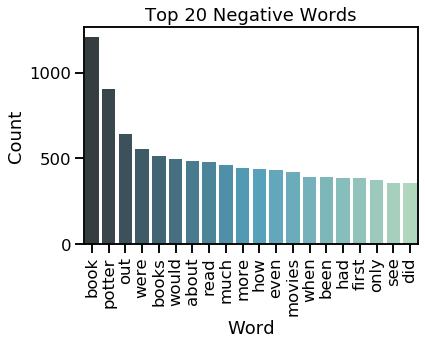

In [266]:
negative_bar_plot = top_words_bar_plot(eda_reviews_top_words_neg, "Top 20 Negative Words")

In [267]:
print("***** Positive *****")
total_words_unique_words(stopwords_removed_dict_pos)
print("***** Negative *****")
total_words_unique_words(stopwords_removed_dict_neg)

***** Positive *****
The total number of words is 88956
The total number of unique words is 9050
***** Negative *****
The total number of words is 89101
The total number of unique words is 9175


In [268]:
#Adding a label to the positive reviews and negative reviews 
positive_df["label"] = "pos"
negative_df["label"] = "neg"

In [269]:
#Combining the positive and negative df together 
combined_df = pd.concat([positive_df, negative_df])

In [270]:
combined_df.head()

review  \
0   The Magic Comes To Life!\n  The Magic Comes T...   
1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4   Great Journey to the Magic World\n  Great Jou...   

                                          new_review  percent_cap  \
0   the magic comes life the magic comes life the...     0.000000   
1   pure magic pure magic pure magic pure magic t...     0.000000   
2   ian enchantment trapdoor imaginary world ench...     0.002169   
3   harry potter and the sorcerer stone harry pot...     0.000000   
4   great journey the magic world great journey t...     0.000000   

                                     review_tokenize  \
0  [the, magic, comes, life, the, magic, comes, l...   
1  [pure, magic, pure, magic, pure, magic, pure, ...   
2  [ian, enchantment, trapdoor, imaginary, world,...   
3  [harry, potter, and, the, sorcerer, stone, har...   
4  [great, journey, the, magic, world, great, jou...   

                                   stopwords_removed label  
0  [magic, comes, life, magic, comes, life, magic...   pos  
1  [pure, magic, pure, magic, pure, magic, pure, ...   pos  
2  [ian, enchantment, trapdoor, imaginary, world,...   pos  
3  [potter, sorcerer, stone, potter, sorcerer, st...   pos  
4  [great, journey, magic, world, great, journey,...   pos

In [293]:
combined_df

index                                             review  \
0        0   The Magic Comes To Life!\n  The Magic Comes T...   
1        1   Pure Magic\n  Pure Magic\n  Pure Magic\n  Pur...   
2        2   Enchantment, Trapdoor to Imaginary World.\n  ...   
3        3   Harry Potter and the Sorcerer's Stone\n  Harr...   
4        4   Great Journey to the Magic World\n  Great Jou...   
..     ...                                                ...   
979    487   Deathly Disappointing\n  Deathly Disappointin...   
980    488   Nothing but disappointing.\n  Nothing but dis...   
981    489   A middling series ends on a low-point.\n  A m...   
982    490   OK but not I'm not Wowed!\n  OK but not I'm n...   
983    491   Its OK, not great.\n  Its OK, not great.\n  I...   

                                            new_review  percent_cap  \
0     the magic comes life the magic comes life the...     0.000000   
1     pure magic pure magic pure magic pure magic t...     0.000000   
2     ian enchantment trapdoor imaginary world ench...     0.002169   
3     harry potter and the sorcerer stone harry pot...     0.000000   
4     great journey the magic world great journey t...     0.000000   
..                                                 ...          ...   
979   owl rofle omg deathly disappointing deathly d...     0.005376   
980   nothing but disappointing nothing but disappo...     0.000000   
981   middling series ends low point middling serie...     0.000000   
982   but not not wowed but not not wowed but not n...     0.000000   
983   dvd its not great its not great its not great...     0.006410   

                                       review_tokenize  \
0    [the, magic, comes, life, the, magic, comes, l...   
1    [pure, magic, pure, magic, pure, magic, pure, ...   
2    [ian, enchantment, trapdoor, imaginary, world,...   
3    [harry, potter, and, the, sorcerer, stone, har...   
4    [great, journey, the, magic, world, great, jou...   
..                                                 ...   
979  [owl, rofle, omg, deathly, disappointing, deat...   
980  [nothing, but, disappointing, nothing, but, di...   
981  [middling, series, ends, low, point, middling,...   
982  [but, not, not, wowed, but, not, not, wowed, b...   
983  [dvd, its, not, great, its, not, great, its, n...   

                                     stopwords_removed label  
0    [magic, comes, life, magic, comes, life, magic...   pos  
1    [pure, magic, pure, magic, pure, magic, pure, ...   pos  
2    [ian, enchantment, trapdoor, imaginary, world,...   pos  
3    [potter, sorcerer, stone, potter, sorcerer, st...   pos  
4    [great, journey, magic, world, great, journey,...   pos  
..                                                 ...   ...  
979  [owl, rofle, omg, deathly, disappointing, deat...   neg  
980  [nothing, disappointing, nothing, disappointin...   neg  
981  [middling, series, ends, low, point, middling,...   neg  
982  [wowed, wowed, wowed, wowed, potter, deathly, ...   neg  
983  [dvd, its, great, its, great, its, great, its,...   neg  

[984 rows x 7 columns]

In [272]:
#I need to reset the index 
combined_df.reset_index(inplace = True)

In [273]:
#Ready to see if I can predict the review sentiment 
no_stopwords_df = pd.DataFrame() 
no_stopwords_df["review"] = combined_df["stopwords_removed"].copy()

In [274]:
no_stopwords_df["label"] = combined_df["label"]

In [275]:
no_stopwords_df.head()

review label
0  [magic, comes, life, magic, comes, life, magic...   pos
1  [pure, magic, pure, magic, pure, magic, pure, ...   pos
2  [ian, enchantment, trapdoor, imaginary, world,...   pos
3  [potter, sorcerer, stone, potter, sorcerer, st...   pos
4  [great, journey, magic, world, great, journey,...   pos

In [276]:
#Now I am going to create my bag of words for the tokenized reviews 
#First, I must remove the labels that I just added... 
no_stopwords_label = no_stopwords_df["label"]
no_stopwords_df.drop("label", axis = 1, inplace = True)
no_stopwords_bow = bag_of_words(no_stopwords_df, "review")

In [277]:
no_stopwords_bow[3]

Counter({'potter': 4,
         'sorcerer': 4,
         'stone': 4,
         'unforgettable': 1,
         'start': 1,
         'fantastic': 1,
         'series': 1,
         'career': 1,
         'impeccable': 1,
         'emma': 1,
         'watson': 1,
         'other': 1,
         'kids': 1})

In [278]:
no_stopwords_df = bow_to_df(no_stopwords_bow)

In [279]:
no_stopwords_df.head()

magic  comes  life  once  upon  long  ago  vivid  fertile  imagination  \
0     11      4     8     1     2     4    1      1        1            3   
1      5      0     0     0     0     0    0      0        0            0   
2      0      0     5     0     0     0    0      0        0            0   
3      0      0     0     0     0     0    0      0        0            0   
4      5      0     0     0     0     0    0      0        0            0   

   ...  peaks  payoffs  footnotes  wowed  lashed  sellout  wash  hairs  \
0  ...      0        0          0      0       0        0     0      0   
1  ...      0        0          0      0       0        0     0      0   
2  ...      0        0          0      0       0        0     0      0   
3  ...      0        0          0      0       0        0     0      0   
4  ...      0        0          0      0       0        0     0      0   

   tingling  lump  
0         0     0  
1         0     0  
2         0     0  
3         0     0  
4         0     0  

[5 rows x 12948 columns]

In [280]:
no_stopwords_df = normalize_df(no_stopwords_df)

In [281]:
no_stopwords_df.head()

magic     comes      life      once      upon      long       ago  \
0  0.020147  0.007326  0.014652  0.001832  0.003663  0.007326  0.001832   
1  0.083333  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.000000  0.018727  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.092593  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

      vivid   fertile  imagination  ...  peaks  payoffs  footnotes  wowed  \
0  0.001832  0.001832     0.005495  ...    0.0      0.0        0.0    0.0   
1  0.000000  0.000000     0.000000  ...    0.0      0.0        0.0    0.0   
2  0.000000  0.000000     0.000000  ...    0.0      0.0        0.0    0.0   
3  0.000000  0.000000     0.000000  ...    0.0      0.0        0.0    0.0   
4  0.000000  0.000000     0.000000  ...    0.0      0.0        0.0    0.0   

   lashed  sellout  wash  hairs  tingling  lump  
0     0.0      0.0   0.0    0.0       0.0   0.0  
1     0.0      0.0   0.0    0.0       0.0   0.0  
2     0.0      0.0   0.0    0.0       0.0   0.0  
3     0.0      0.0   0.0    0.0       0.0   0.0  
4     0.0      0.0   0.0    0.0       0.0   0.0  

[5 rows x 12948 columns]

In [282]:
#Now I need to remove the total column for each df 
no_stopwords_df.drop("total", axis = 1, inplace = True)

In [283]:
#Creating a testing and training df for the normalized dfs 
no_stopwords_test_train = no_stopwords_df.copy()
test_train_label = combined_df["label"]

In [322]:
#Creating 4 df: 1: the training df with label removed, 2: the testing df with label removed, 3: the training label, 4: testing label
no_stopwords_train, no_stopwords_test, no_stopwords_train_label, no_stopwords_test_label = train_test_split(no_stopwords_test_train, test_train_label, test_size = .3, random_state = 9)

In [323]:
#Getting a count of positive and negative opinions in the test label 
print(Counter(no_stopwords_test_label))
#There are roughly the same number of positive and negative reviews in the test and train set. 

Counter({'pos': 148, 'neg': 148})


In [324]:
#Naive Bayes attempt Multinomial 
clf = MultinomialNB()
clf.fit(no_stopwords_train, no_stopwords_train_label)
test_predicted = clf.predict(no_stopwords_test)
#Getting the accuracy for naive bayes 
accuracy = accuracy_score(no_stopwords_test_label, test_predicted, normalize = True)
print("The accuracy is", accuracy)
cm = confusion_matrix(no_stopwords_test_label, test_predicted)
# confusion_matrix_graph(cm, accuracy, "NB Multinomial No Stopwords")
tn, fp, fn, tp = cm.ravel()
print(cm)
print("The number of true negatives is: ", tn)
print("The number of false positives is: ", fp)
print("The number of false negatives is: ", fn)
print("The number of true positives is: ", tp)

The accuracy is 0.902027027027027
[[136  12]
 [ 17 131]]
The number of true negatives is:  136
The number of false positives is:  12
The number of false negatives is:  17
The number of true positives is:  131
